<a href="https://colab.research.google.com/github/brytlao/Practical_computer_vision/blob/master/CHAPTER_03_Image_Filtering_and_Transformations_in_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 03: Image Filtering and Transformations in OpenCV**

Discusses simple image manipulations, such as point-operation filters, 2D filters, as well as transformations.

# **Datasets and libraries required**

In [0]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import cv2

# plots figures inside notebook
%matplotlib inline

# plotting parameters
FIG_WIDTH = 3
FIG_HEIGHT = 2
NUM_ROW = 1
NUM_COL = 4

In [2]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
img_name = list(uploaded)[0]

Saving dragon.png to dragon (5).png


**Convert and plot image**

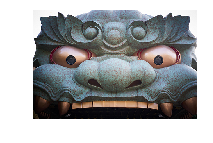

In [3]:
# read an image from file
img = cv2.imread(img_name)

# plotting function
def plot_cv_img(input_image):
    """
    Convert an image from BGR to RGB then plot
    """
    # change color channel
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    
    # turn off axes
    plt.axis('off')

# plot image
plt.figure(figsize=(3,2))
plot_cv_img(img)

**Crop image**

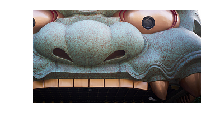

In [4]:
plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))
plot_cv_img(img[100:400,100:400])

# **Image manipulation**

**Convert to gray**

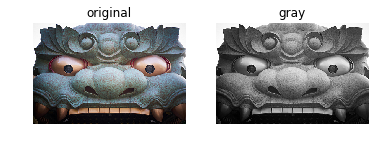

In [5]:
# plotting function considering gray images:
def plot_cv_img(ax,input_image,img_title,is_gray=False):
    """
    Check if an image is to be displayed gray
    Convert an image from BGR to RGB then plot
    """
    # change color channel
    if not is_gray:
      ax.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
    else:
      ax.imshow(input_image,cmap='gray')
      
    # turn off axes
    ax.axis('off')

    # set title
    ax.set_title(img_title)
    
# set figure params
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# plot image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original')

# plot image
ax = plt.subplot(1,num_fig,2)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plot_cv_img(ax,gray,'gray',is_gray=True)

**Display patch of gray image**

[[ 8  8  8  9 10  9 10  8  8  9]
 [15 18 19 14 10  9 11 11 10 10]
 [ 6  7  7 10  9  9  9 10  9  9]
 [ 8  9  9  9  9 10  9  8  7  8]
 [12 12  9 10 10  8 10  9 10 10]
 [10 10  9  8  9  6  7  7  7  9]
 [ 8  8  6  8  7 10  7  8  7  6]
 [ 9  7  9  8  8  7  9  7  7  6]
 [ 7  5  7  6  6  6  5  7  9  8]
 [ 6  7  7  5  6  7  6  6  5  3]]


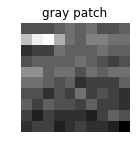

In [6]:
# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# extract patch of pixels
patch_gray = gray[250:260,250:260]

# plot patch and print values
plt.figure(figsize=(FIG_HEIGHT,FIG_HEIGHT))
ax = plt.subplot(1,1,1)
plot_cv_img(ax,patch_gray,'gray patch',is_gray=True)
print(patch_gray)

# **Introduction to filters**

**Salt and pepper noise**

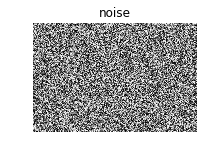

In [7]:
# init noise image with zeros
n_row = gray.shape[1]
n_col = gray.shape[0]
noise = np.zeros((n_col,n_row))

# fill image with rand numbers within given range
cv2.randu(noise,0,256)

# plot image
plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))
ax = plt.subplot(1,1,1)
plot_cv_img(ax,noise,'noise',is_gray=True)

**Add noise to image**

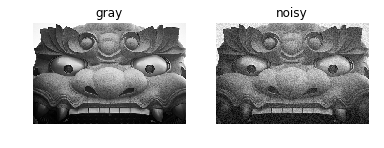

In [8]:
# image params
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# current image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,gray,'gray',is_gray=True)

# add noise to existing image
noisy_gray = gray + np.array(0.2*noise,dtype=np.int)
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,noisy_gray,'noisy',is_gray=True)

**Linear filters**

Point-based filters

In [0]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
# point operation
def point_operation(img,K,L):
  """
  Applies point operation to grayscale image
  """
  # convert image to array
  img = np.asarray(img,dtype=np.float)
  
  # perform operation
  img = img*K + L
  
  # clip pixel values
  img[img>255] = 255
  img[img<0] = 0
  
  return np.asarray(img,dtype=np.int)

In [0]:
# main function
def main():
  # image params
  num_fig = 4
  plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))
  
  # load original image
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
  # plot original
  ax = plt.subplot(1,num_fig,1)
  plot_cv_img(ax,gray,'original',is_gray=True)

  # k = 0.5, l = 0
  out1 = point_operation(gray,0.5,0)
  ax = plt.subplot(1,num_fig,2)
  plot_cv_img(ax,out1,'k=0.5, l=0',is_gray=True)
  
  # k = 1., l = 10
  out2 = point_operation(gray,1.,10)
  ax = plt.subplot(1,num_fig,3)
  plot_cv_img(ax,out2,'k=1., l=10',is_gray=True)
  
  # k = 0.8, l = 15
  out3 = point_operation(gray,0.7,25)
  ax = plt.subplot(1,num_fig,4)
  plot_cv_img(ax,out3,'k=0.7, l=25',is_gray=True)

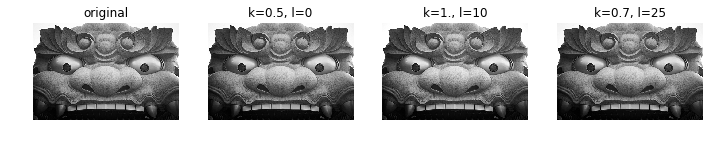

In [12]:
# run functions
if __name__ == '__main__':
  main()

Box filters

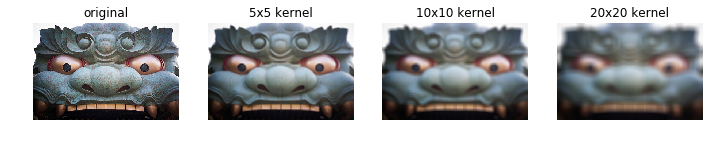

In [13]:
# image params
num_fig = 4
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# === original ===
# plot original
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original',is_gray=False)

# === 5x5 ===
# design kernel matrix
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

# plot filtered
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,dst,'5x5 kernel',is_gray=False)

# === 10x10 ===
# design kernel matrix
kernel = np.ones((10,10),np.float32)/100
dst = cv2.filter2D(img,-1,kernel)

# plot filtered
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,dst,'10x10 kernel',is_gray=False)

# === 20x20 ===
# design kernel matrix
kernel = np.ones((20,20),np.float32)/400
dst = cv2.filter2D(img,-1,kernel)

# plot filtered
ax = plt.subplot(1,num_fig,4)
plot_cv_img(ax,dst,'20x20 kernel',is_gray=False)

note: the following is equivalent
* kernel_size(5,5)
* dst = cv2.blur(img,kernel_size)

**Non-linear filters**

Smoothing a photo

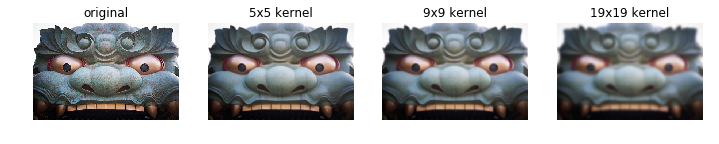

In [14]:
# image params
num_fig = 4
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# === original ===
# plot original
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original',is_gray=False)

# === 5x5 ===
# design kernel matrix
kernel_size = (5,5)
blur = cv2.GaussianBlur(img,kernel_size,0)

# plot filtered
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,blur,'5x5 kernel',is_gray=False)

# === 9x9 ===
# design kernel matrix
kernel_size = (9,9)
blur = cv2.GaussianBlur(img,kernel_size,0)

# plot filtered
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,blur,'9x9 kernel',is_gray=False)

# === 19x19 ===
# design kernel matrix
kernel_size = (19,19)
blur = cv2.GaussianBlur(img,kernel_size,0)

# plot filtered
ax = plt.subplot(1,num_fig,4)
plot_cv_img(ax,blur,'19x19 kernel',is_gray=False)

note: kernel size must be odd

Median filter

In [0]:
# initialize noise image with zeros
noise = np.zeros(img.shape[:2])

# fill image with noise
cv2.randu(noise,0,256)

# add noise to existing image
noise_factor = 0.1
noisy_img = np.zeros(img.shape)
for i in range(img.shape[2]):
  noisy_img[:,:,i] = img[:,:,i] + np.array(noise_factor*noise,dtype=np.int)
  
# convert data type
noisy_img = np.asarray(noisy_img,dtype=np.uint8)

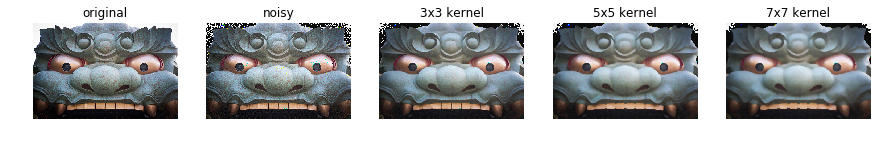

In [16]:
# image params
num_fig = 5
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# === original ===
# plot original
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original',is_gray=False)

# === noisy ===
# plot noisy
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,noisy_img,'noisy',is_gray=False)

# === 3x3 ===
# design kernel matrix
kernel_size = 3
blur = cv2.medianBlur(noisy_img,kernel_size)

# plot filtered
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,blur,'3x3 kernel',is_gray=False)

# === 5x5 ===
# design kernel matrix
kernel_size = 5
blur = cv2.medianBlur(noisy_img,kernel_size)

# plot filtered
ax = plt.subplot(1,num_fig,4)
plot_cv_img(ax,blur,'5x5 kernel',is_gray=False)

# === 7x7 ===
# design kernel matrix
kernel_size = 7
blur = cv2.medianBlur(noisy_img,kernel_size)

# plot filtered
ax = plt.subplot(1,num_fig,5)
plot_cv_img(ax,blur,'7x7 kernel',is_gray=False)

**Histogram equalization**

In [0]:
# load original image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

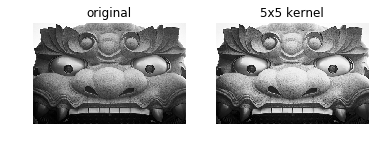

In [18]:
# image params
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# === original ===
# plot original
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,gray,'original',is_gray=True)

# === equalized ===
# equlizing function
equ = cv2.equalizeHist(gray)

# plot filtered
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,equ,'5x5 kernel',is_gray=True)

**Image gradients**

Sobel filter

In [0]:
# load original image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

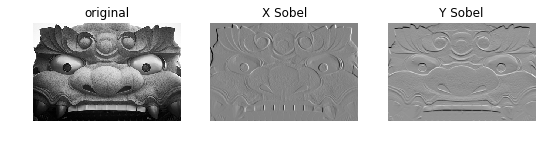

In [20]:
# image params
num_fig = 3
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# === original ===
# plot original
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,gray,'original',is_gray=True)

# === X Sobel ===
# sobel filter
x_sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)

# plot filtered
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,x_sobel,'X Sobel',is_gray=True)

# === Y Sobel ===
# sobel filter
y_sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

# plot filtered
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,y_sobel,'Y Sobel',is_gray=True)

Laplacian filter

In [0]:
# load original image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

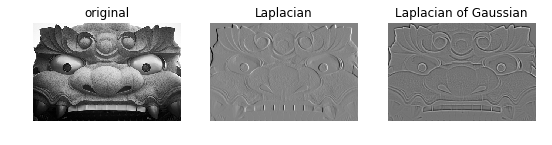

In [22]:
# image params
num_fig = 3
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# === original ===
# plot original
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,gray,'original',is_gray=True)

# === Laplacian ===
# laplacian filter
lapl = cv2.Laplacian(gray,cv2.CV_64F,ksize=5)

# plot filtered
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,x_sobel,'Laplacian',is_gray=True)

# === Laplacian of Gaussian ===
# gaussian filter
blur = cv2.GaussianBlur(gray,(5,5),0)

# laplacian filter
log = cv2.Laplacian(blur,cv2.CV_64F,ksize=5)

# plot filtered
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,log,'Laplacian of Gaussian',is_gray=True)

# **Transformations on an image**

**Translation**

In [0]:
# input shape
w, h = img.shape[1], img.shape[0]

In [0]:
# translation function
def trans_mat(img,tx,ty):
  """
  returns translated matrix
  """
  # input shape
  w, h = img.shape[1], img.shape[0]
  
  # create translation matrix
  translation_matrix = np.float32([[1,0,tx],[0,1,ty]])

  # apply translation
  output_size = (w*2,h*2)
  translated_img = cv2.warpAffine(img,translation_matrix,output_size)
  
  return translated_img

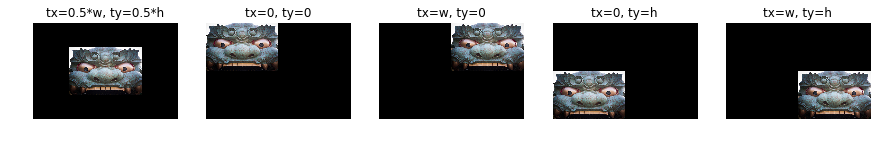

In [25]:
# image params
num_fig = 5
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))
w, h = img.shape[1], img.shape[0]

# === original ===
# compute translated mat
tx = w/2 # half of width
ty = h/2 # half of height
trans_img = trans_mat(img,tx,ty)

# plot translated
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,trans_img,'tx=0.5*w, ty=0.5*h',is_gray=False)

# === upper left ===
# compute translated mat
tx = 0 # half of width
ty = 0 # half of height
trans_img = trans_mat(img,tx,ty)

# plot translated
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,trans_img,'tx=0, ty=0',is_gray=False)

# === upper right ===
# compute translated mat
tx = w # half of width
ty = 0 # half of height
trans_img = trans_mat(img,tx,ty)

# plot translated
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,trans_img,'tx=w, ty=0',is_gray=False)

# === lower left ===
# compute translated mat
tx = 0 # half of width
ty = h # half of height
trans_img = trans_mat(img,tx,ty)

# plot translated
ax = plt.subplot(1,num_fig,4)
plot_cv_img(ax,trans_img,'tx=0, ty=h',is_gray=False)

# === lower right ===
# compute translated mat
tx = w # half of width
ty = h # half of height
trans_img = trans_mat(img,tx,ty)

# plot translated
ax = plt.subplot(1,num_fig,5)
plot_cv_img(ax,trans_img,'tx=w, ty=h',is_gray=False)

**Rotation**

In [0]:
# input shape
w, h = img.shape[1], img.shape[0]

In [0]:
# rotation function
def rot_mat(img,rotation,scale):
  """
  returns rotated matrix
  """
  # input shape
  w, h = img.shape[1], img.shape[0]
  
  # create rotation matrix
  rotation_matrix = cv2.getRotationMatrix2D((w/2,h/2),rotation,1)

  # apply rotation
  output_size = (w*2,h*2)
  rotated_img = cv2.warpAffine(img,rotation_matrix,output_size)
  
  return rotated_img

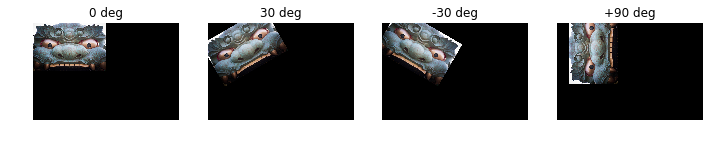

In [28]:
# image params
num_fig = 4
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))
w, h = img.shape[1], img.shape[0]

# === original ===
# compute translated mat
rotation = 0 # rotation angle in degrees
scale = 1 # keep same size
rot_img = rot_mat(img,rotation,scale)

# plot translated
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,rot_img,'0 deg',is_gray=False)

# === +30 deg ===
# compute translated mat
rotation = 30 # rotation angle in degrees
scale = 1 # keep same size
rot_img = rot_mat(img,rotation,scale)

# plot translated
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,rot_img,'30 deg',is_gray=False)

# === -30 deg ===
# compute translated mat
rotation = -30 # rotation angle in degrees
scale = 1 # keep same size
rot_img = rot_mat(img,rotation,scale)

# plot translated
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,rot_img,'-30 deg',is_gray=False)

# === +90 deg ===
# compute translated mat
rotation = 90 # rotation angle in degrees
scale = 1 # keep same size
rot_img = rot_mat(img,rotation,scale)

# plot translated
ax = plt.subplot(1,num_fig,4)
plot_cv_img(ax,rot_img,'+90 deg',is_gray=False)

**Affine transformation**

In [0]:
# input shape
w, h = img.shape[1], img.shape[0]

In [0]:
# rotation function
def affine_mat(img,pts1,pts2):
  """
  returns affine transform matrix
  """
  # input shape
  w, h = img.shape[1], img.shape[0]
  
  # create affine transform matrix
  affine_mat = cv2.getAffineTransform(pts1,pts2)

  # apply affine transform
  output_size = (w,h)
  affine_img = cv2.warpAffine(img,affine_mat,output_size)
  
  return affine_img

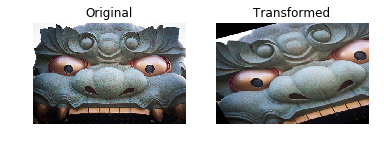

In [31]:
# image params
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# === original ===
# plot translated
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'Original',is_gray=False)

# === affine transformed ===
# compute affine transform mat
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
affine_img = affine_mat(img,pts1,pts2)

# plot translated
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,affine_img,'Transformed',is_gray=False)

# **Image pyramids**

**Downsampling**

Each dimension is halved

In [0]:
# downsampling
lower_res1 = cv2.pyrDown(img)
lower_res2 = cv2.pyrDown(lower_res1)
lower_res3 = cv2.pyrDown(lower_res2)

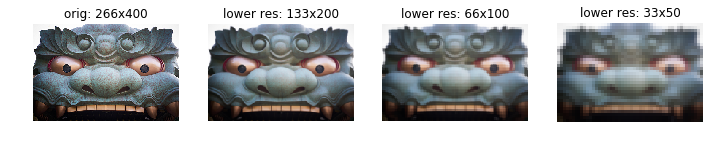

In [33]:
# image params
num_fig = 4
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# original
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'orig: 266x400',is_gray=False)

# lower res 1
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,lower_res1,'lower res: 133x200',is_gray=False)

# lower res 2
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,lower_res2,'lower res: 66x100',is_gray=False)

# lower res 1
ax = plt.subplot(1,num_fig,4)
plot_cv_img(ax,lower_res3,'lower res: 33x50',is_gray=False)

**Upsampling**

Each dimension is doubled

In [0]:
# upsampling
higher_res1 = cv2.pyrUp(lower_res3)
higher_res2 = cv2.pyrUp(higher_res1)
higher_res3 = cv2.pyrUp(higher_res2)

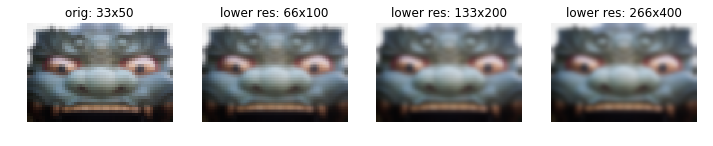

In [35]:
# image params
num_fig = 4
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# original
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,lower_res3,'orig: 33x50',is_gray=False)

# lower res 1
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,higher_res1,'lower res: 66x100',is_gray=False)

# lower res 2
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,higher_res2,'lower res: 133x200',is_gray=False)

# lower res 1
ax = plt.subplot(1,num_fig,4)
plot_cv_img(ax,higher_res3,'lower res: 266x400',is_gray=False)